In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import files

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import log_loss

# Leyendo DataSet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv( "/content/drive/MyDrive/Orga Datos/TP2/Training.csv" )
df

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.5300,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.00,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,3/21/2016,3/25/2016,2016 - 3,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245

In [ ]:
test = pd.read_csv( "/content/drive/MyDrive/Orga Datos/TP2/Test.csv" )
test

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Prod_Category_A
0,6140,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6118,10689,6436,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,None,None,None,None,None,None,NaT,4/30/2019,4/12/2019,Person_Name_13,Product_Family_171,Product_Name_332,EUR,0.325,USD,0.36761,5/1/2019,5/31/2019,2019 - 5,Q2,2019,NaT,0,EUR,162240.0,EUR,367419.0,Prod_Category_A_None
1,6146,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6118,10689,6436,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,None,None,None,None,None,None,NaT,4/30/2019,4/12/2019,Person_Name_13,Product_Family_167,Product_Name_315,EUR,0.320,USD,0.36195,5/1/2019,5/31/2019,2019 - 5,Q2,2019,NaT,0,EUR,78624.0,EUR,367419.0,Prod_Category_A_None
2,6151,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6118,10689,6436,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,None,None,None,None,None,None,NaT,4/30/2019,4/12/2019,Person_Name_13,Product_Family_140,Product_Name_241,EUR,0.275,USD,0.31105,5/1/2019,5/31/2019,2019 - 5,Q2,2019,NaT,0,EUR,126555.0,EUR,367419.0,Prod_Category_A_None
3,6118,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6117,10690,6504,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,None,None,None,None,None,None,NaT,4/30/2019,4/25/2019,Person_Name_13,Product_Family_171,Product_Name_328,EUR,0.325,USD,0.36761,6/1/2019,6/28/2019,2019 - 6,Q2,2019,NaT,1,EUR,243360.0,EUR,757783.5,Prod_Category_A_None
4,6124,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6117,10690,6504,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,None,None,None,None,None,None,NaT,4/30/2019,4/25/2019,Person_Name_13,Product_Family_167,Product_Name_315,EUR,0.320,USD,0.36195,6/1/2019,6/29/2019,2019 - 6,Q2,2019,NaT,0,EUR,157248.0,EUR,757783.5,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,16345,EMEA,KSA,1,1,0,0,0,Bureaucratic_Code_4,6/12/2017,Source_3,South Africa,Account_Name_1686,Opportunity_Name_11120,12364,6508,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_7,4/26/2019,None,None,None,None,None,None,NaT,5/24/2019,4/26/2019,Person_Name_13,Product_Family_213,Product_Name_447,USD,0.300,USD,0.30000,5/1/2019,5/10/2019,2019 - 5,Q2,2019,NaT,0,USD,124740.0,USD,147750.0,Prod_Category_A_None
2547,15218,Americas,SE America,1,1,0,0,0,Bureaucratic_Code_4,6/8/2018,None,United States,Account_Name_768,Opportunity_Name_9694,12365,6510,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,4/26/2019,None,None,None,None,None,None,N

# Pre proceso de datos

## Conversion a Dolar

In [ ]:
df.loc[df['Total_Amount_Currency'] == 'JPY', 'Total_Amount'] = df['Total_Amount']*0.0096
df.loc[df['Total_Amount_Currency'] == 'JPY', 'Total_Amount_Currency'] = 'USD'

df.loc[df['Total_Amount_Currency'] == 'EUR', 'Total_Amount'] = df['Total_Amount']*1.17
df.loc[df['Total_Amount_Currency'] == 'EUR', 'Total_Amount_Currency'] = 'USD'

df.loc[df['Total_Amount_Currency'] == 'AUD', 'Total_Amount'] = df['Total_Amount']*0.70
df.loc[df['Total_Amount_Currency'] == 'AUD', 'Total_Amount_Currency'] = 'USD'

df.loc[df['Total_Amount_Currency'] == 'GBP', 'Total_Amount'] = df['Total_Amount']*1.29
df.loc[df['Total_Amount_Currency'] == 'GBP', 'Total_Amount_Currency'] = 'USD'

In [ ]:
short_df = df[['Region', 'Delivery_Quarter','Stage', 'Total_Amount', 'Bureaucratic_Code', 'TRF']].rename(columns={'Stage': 'Decision'})
short_df = short_df[ (short_df['Decision'] == 'Closed Won') | (short_df['Decision'] == 'Closed Lost') ]
short_df['Decision'] = np.where(short_df['Decision'] == 'Closed Won',1,0)
short_df.dropna(inplace=True)

In [ ]:
test.loc[test['Total_Amount_Currency'] == 'JPY', 'Total_Amount'] = test['Total_Amount']*0.0096
test.loc[test['Total_Amount_Currency'] == 'JPY', 'Total_Amount_Currency'] = 'USD'

test.loc[test['Total_Amount_Currency'] == 'EUR', 'Total_Amount'] = test['Total_Amount']*1.17
test.loc[test['Total_Amount_Currency'] == 'EUR', 'Total_Amount_Currency'] = 'USD'

test.loc[test['Total_Amount_Currency'] == 'AUD', 'Total_Amount'] = test['Total_Amount']*0.70
test.loc[test['Total_Amount_Currency'] == 'AUD', 'Total_Amount_Currency'] = 'USD'

test.loc[test['Total_Amount_Currency'] == 'GBP', 'Total_Amount'] = test['Total_Amount']*1.29
test.loc[test['Total_Amount_Currency'] == 'GBP', 'Total_Amount_Currency'] = 'USD'

In [ ]:
short_test = test[['Region', 'Delivery_Quarter', 'Total_Amount', 'Bureaucratic_Code', 'TRF']]
short_test.dropna(inplace=True)




A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Normalizando Total Amount

In [ ]:
short_df['Total_Amount_Above_average'] = short_df['Total_Amount'] > short_df['Total_Amount'].mean()
short_df['TRF_Above_average'] = short_df['TRF'] > short_df['TRF'].mean()
short_df.drop(columns=['TRF', 'Total_Amount'], inplace=True)
short_df

,Region,Delivery_Quarter,Decision,Bureaucratic_Code,Total_Amount_Above_average,TRF_Above_average
0,EMEA,Q2,0,Bureaucratic_Code_4,True,True
1,EMEA,Q1,1,Bureaucratic_Code_4,False,False
2,Americas,Q1,1,Bureaucratic_Code_4,False,False
3,Americas,Q1,0,Bureaucratic_Code_5,True,True
4,Americas,Q1,0,Bureaucratic_Code_5,True,True
...,...,...,...,...,...,...
16942,EMEA,Q1,1,Bureaucratic_Code_4,False,False
16943,EMEA,Q2,1,Bureaucratic_Code_4,False,False
16944,EMEA,Q1,1,Bureaucratic_Code_4,False,False
16945,Americas,Q2,0,Bureaucratic_Code_4,True,True


In [ ]:
short_test['Total_Amount_Above_average'] = short_test['Total_Amount'] > short_test['Total_Amount'].mean()
short_test['TRF_Above_average'] = short_test['TRF'] > short_test['TRF'].mean()
short_test.drop(columns=['TRF', 'Total_Amount'], inplace=True)
short_test


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Region,Delivery_Quarter,Bureaucratic_Code,Total_Amount_Above_average,TRF_Above_average
0,EMEA,Q2,Bureaucratic_Code_4,False,False
1,EMEA,Q2,Bureaucratic_Code_4,False,False
2,EMEA,Q2,Bureaucratic_Code_4,False,False
3,EMEA,Q2,Bureaucratic_Code_4,False,False
4,EMEA,Q2,Bureaucratic_Code_4,False,False
...,...,...,...,...,...
2546,EMEA,Q2,Bureaucratic_Code_4,False,False
2547,Americas,Q4,Bureaucratic_Code_4,False,False
2548,Americas,Q4,Bureaucratic_Code_4,False,False
2549,Americas,Q3,Bureaucratic_Code_4,False,False


## Spliteando

In [ ]:
X = short_df.drop( 'Decision', axis=1 )
y = short_df['Decision']
X

,Region,Delivery_Quarter,Bureaucratic_Code,Total_Amount_Above_average,TRF_Above_average
0,EMEA,Q2,Bureaucratic_Code_4,True,True
1,EMEA,Q1,Bureaucratic_Code_4,False,False
2,Americas,Q1,Bureaucratic_Code_4,False,False
3,Americas,Q1,Bureaucratic_Code_5,True,True
4,Americas,Q1,Bureaucratic_Code_5,True,True
...,...,...,...,...,...
16942,EMEA,Q1,Bureaucratic_Code_4,False,False
16943,EMEA,Q2,Bureaucratic_Code_4,False,False
16944,EMEA,Q1,Bureaucratic_Code_4,False,False
16945,Americas,Q2,Bureaucratic_Code_4,True,True


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train.shape

(5048, 5)
(11776,)
(5048,)


(11776, 5)

## Codificado

In [ ]:
ohe_1 = OneHotEncoder()
ohe_1.fit(X_train)
ohe_2 = OneHotEncoder()
ohe_2.fit(short_test)


X_train_enc = ohe_1.transform(X_train)
X_test_enc = ohe_1.transform(X_test)
short_test_enc = ohe_1.transform( short_test )

# Entrenando y Prediciendo

In [ ]:
rfr = RandomForestRegressor(n_estimators=100, oob_score=True )

In [ ]:
rfr.fit(X_train_enc, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rfr_pred = rfr.predict(X_test_enc)

In [ ]:
rfr_pred

array([0.92511206, 0.77309363, 0.29580674, ..., 0.92511206, 0.57445538,
       0.63152764])

In [ ]:
loss = log_loss(y_test, rfr_pred)
print(f"Log loss is {loss}")

Log loss is 0.5034115642631486


# Prediciendo Test

In [ ]:
pred_test = rfr.predict( short_test_enc )
pred_test

array([0.61517483, 0.61517483, 0.61517483, ..., 0.61264845, 0.50090378,
       0.26076019])

In [ ]:
resultado = pd.DataFrame()
resultado['Opportunity_ID'] = test['Opportunity_ID']
resultado['target'] = pred_test
resultado.sort_values('Opportunity_ID',inplace = True)
resultado = resultado.drop_duplicates('Opportunity_ID',keep = 'last')
resultado.set_index('Opportunity_ID', inplace = True)

In [ ]:
csv3 = resultado.to_csv('RGR_version_1.csv')
#files.download('RGR_version_1.csv')

In [ ]:
rfr.base_estimator_

No handles with labels found to put in legend.


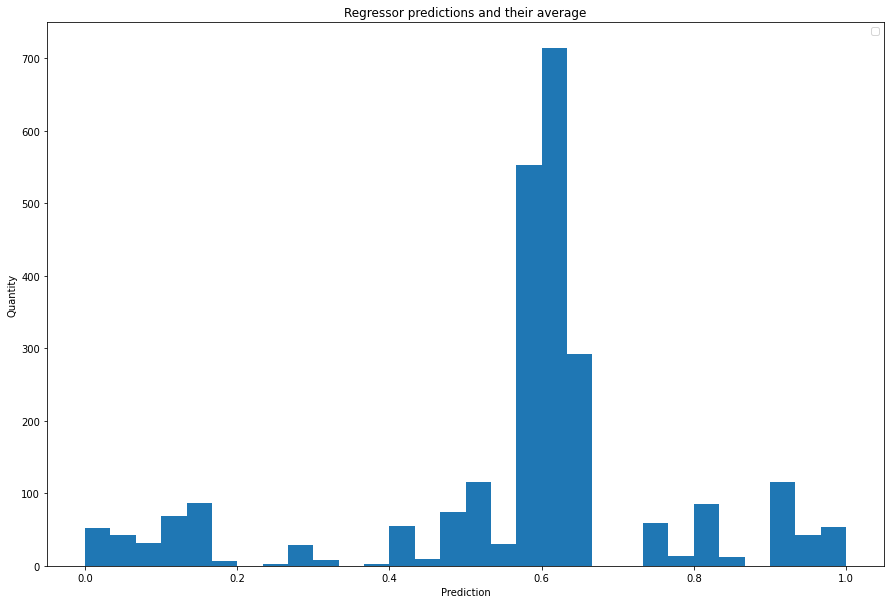

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(pred_test, bins=30)

#plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('Quantity')
plt.xlabel('Prediction')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()

In [ ]:
rfr.feature_importances_

array([2.18455048e-02, 6.47848667e-03, 5.94386266e-03, 2.53315672e-01,
       8.23600429e-03, 8.76542125e-03, 8.94279750e-03, 1.46317960e-02,
       1.15735717e-02, 1.42141259e-02, 6.94811232e-03, 8.71563226e-03,
       7.95557650e-08, 1.92949279e-02, 2.68390662e-01, 1.48616026e-01,
       1.47272482e-01, 2.23543477e-02, 2.44604879e-02])